# Midterm

## 1) Linear Classifier

### a) Run the perceptron algo

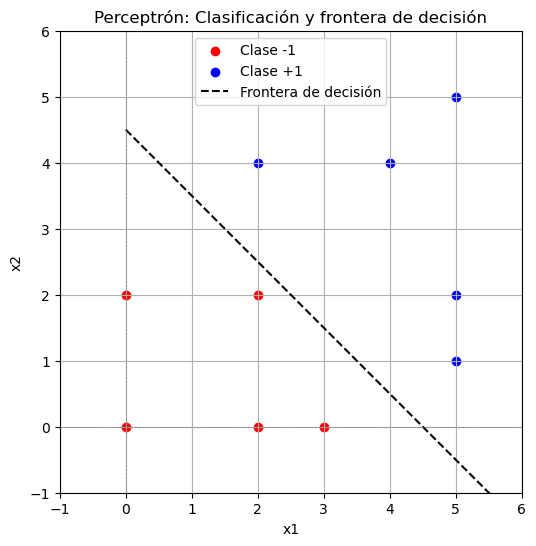

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
points = [
    ((0, 0), -1),
    ((2, 0), -1),
    ((3, 0), -1),
    ((0, 2), -1),
    ((2, 2), -1),
    ((5, 1), +1),
    ((5, 2), +1),
    ((2, 4), +1),
    ((4, 4), +1),
    ((5, 5), +1)
]

# Separar por clases
negatives = [p[0] for p in points if p[1] == -1]
positives = [p[0] for p in points if p[1] == +1]

# Crear arrays para graficar
x_neg, y_neg = zip(*negatives)
x_pos, y_pos = zip(*positives)

# Crear figura
plt.figure(figsize=(8, 6))

# Graficar puntos
plt.scatter(x_neg, y_neg, color='red', label='Clase -1')
plt.scatter(x_pos, y_pos, color='blue', label='Clase +1')

# Graficar recta de decisión: x2 = -x1 + 4.5
x_vals = np.linspace(0, 6, 100)
y_vals = -x_vals + 4.5
plt.plot(x_vals, y_vals, 'k--', label='Frontera de decisión')

# Ajustes del gráfico
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptrón: Clasificación y frontera de decisión')
plt.legend()
plt.grid(True)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar gráfico
plt.show()


### c) Use SVM to find theta and theta_0

In [2]:
import numpy as np
from sklearn.svm import SVC

# Datos
X = np.array([
    [0, 0],
    [2, 0],
    [3, 0],
    [0, 2],
    [2, 2],
    [5, 1],
    [5, 2],
    [2, 4],
    [4, 4],
    [5, 5]
])

y = np.array([-1, -1, -1, -1, -1, +1, +1, +1, +1, +1])

# Entrenar SVM con margen duro (C muy grande)
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

# Obtener parámetros
theta = model.coef_[0]
theta_0 = model.intercept_[0]

# Mostrar resultados
print("θ (vector):", theta)
print("θ₀ (offset):", theta_0)

# Normalizar
norm = np.linalg.norm(theta)
theta_normalized = theta / norm
theta_0_normalized = theta_0 / norm

print("\nValores normalizados (máximo margen):")
print("θ (normalizado):", theta_normalized)
print("θ₀ (normalizado):", theta_0_normalized)


θ (vector): [0.9996875 1.       ]
θ₀ (offset): -4.999062500000003

Valores normalizados (máximo margen):
θ (normalizado): [0.70699627 0.70721728]
θ₀ (normalizado): -3.535423360061617


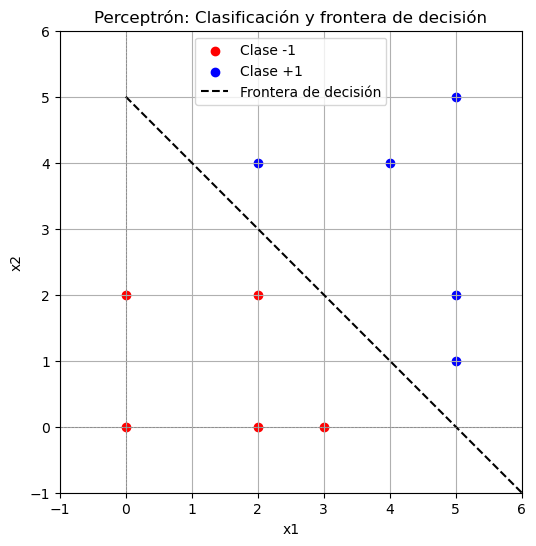

In [3]:
# Crear figura
plt.figure(figsize=(8, 6))

# Graficar puntos
plt.scatter(x_neg, y_neg, color='red', label='Clase -1')
plt.scatter(x_pos, y_pos, color='blue', label='Clase +1')

# Graficar recta de decisión: x2 = -x1 + 4.5
x_vals = np.linspace(0, 6, 100)
y_vals = -x_vals + 5
plt.plot(x_vals, y_vals, 'k--', label='Frontera de decisión')

# Ajustes del gráfico
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptrón: Clasificación y frontera de decisión')
plt.legend()
plt.grid(True)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar gráfico
plt.show()


### e) Calcula LOss val

In [15]:
def Loss(value):
    return max(0, 1 - value)

theta = np.array([1,1])
theta_0 = -5
Loss_val = 0
for i in range(len(X)):
    #print(f'X es : {X[i]}')
    #print(f'Multiplicacion es : {Loss(y[i]*(X[i]@theta + theta_0))}')
    Loss_val+=Loss(y[i]*(X[i]@theta + theta_0))
print(f'Final Loss val is: {Loss_val}')


Final Loss val is: 0


### f) Calcula loss val si ambos estan divididos por 2

In [18]:
new_theta = theta/2
new_theta_0 = theta_0/2
Loss_val = 0
for i in range(len(X)):
    print(f'X es : {X[i]}')
    print(f'Multiplicacion es : {Loss(y[i]*(X[i]@new_theta + new_theta_0))}')
    Loss_val+=Loss(y[i]*(X[i]@new_theta + new_theta_0))
print(f'Final Loss val is: {Loss_val}')

X es : [0 0]
Multiplicacion es : 0
X es : [2 0]
Multiplicacion es : 0
X es : [3 0]
Multiplicacion es : 0
X es : [0 2]
Multiplicacion es : 0
X es : [2 2]
Multiplicacion es : 0.5
X es : [5 1]
Multiplicacion es : 0.5
X es : [5 2]
Multiplicacion es : 0
X es : [2 4]
Multiplicacion es : 0.5
X es : [4 4]
Multiplicacion es : 0
X es : [5 5]
Multiplicacion es : 0
Final Loss val is: 1.5


## Problem 2) Kernel Methods

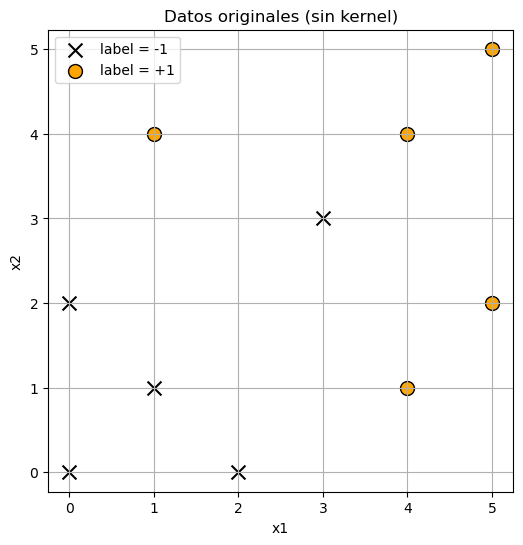

In [20]:
import numpy as np

# Coordenadas X (10 puntos, 2D)
X = np.array([
    [0, 0],  # -1
    [2, 0],  # -1
    [1, 1],  # -1
    [0, 2],  # -1
    [3, 3],  # -1
    [4, 1],  # +1
    [5, 2],  # +1
    [1, 4],  # +1
    [4, 4],  # +1
    [5, 5]   # +1
])

# Etiquetas correspondientes
y = np.array([-1, -1, -1, -1, -1, +1, +1, +1, +1, +1])

# Errores del perceptrón para cada punto
mistakes = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15])

# Separar por clase
negatives = X[y == -1]
positives = X[y == +1]

# Graficar
plt.figure(figsize=(6, 6))
plt.scatter(negatives[:, 0], negatives[:, 1], color='black', marker='x', s=100, label='label = -1')
plt.scatter(positives[:, 0], positives[:, 1], color='orange', edgecolor='black', s=100, label='label = +1')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Datos originales (sin kernel)")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

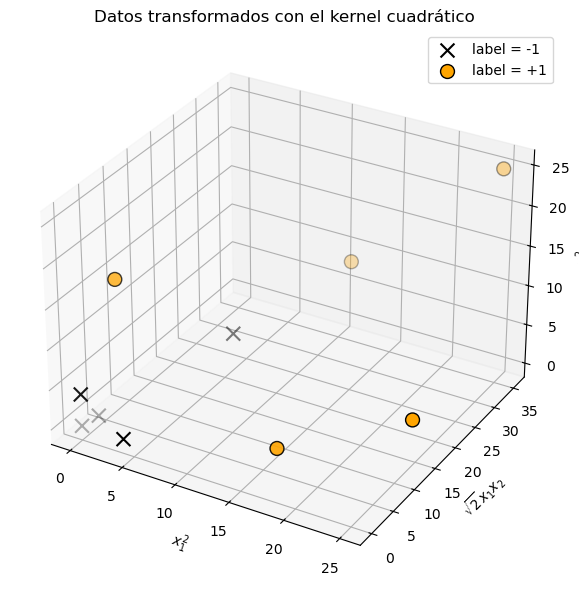

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Mapeo explícito del kernel cuadrático
def phi(x):
    x1, x2 = x
    return np.array([x1**2, np.sqrt(2)*x1*x2, x2**2])

# Aplicar el kernel a todos los puntos
phi_X = np.array([phi(x) for x in X])

# Separar clases para graficar
phi_neg = phi_X[y == -1]
phi_pos = phi_X[y == +1]

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(phi_neg[:, 0], phi_neg[:, 1], phi_neg[:, 2], color='black', marker='x', s=100, label='label = -1')
ax.scatter(phi_pos[:, 0], phi_pos[:, 1], phi_pos[:, 2], color='orange', edgecolor='black', s=100, label='label = +1')

ax.set_xlabel(r'$x_1^2$')
ax.set_ylabel(r'$\sqrt{2}x_1x_2$')
ax.set_zlabel(r'$x_2^2$')
ax.set_title("Datos transformados con el kernel cuadrático")
ax.legend()
plt.tight_layout()
plt.show()


Do the algorythm using the new kernel

(10, 3)

phi